In [19]:
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
import numpy as np
import matplotlib.pyplot as plt

# Some parameters used later

In [4]:
batch_size = 100
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Download the MNIST data

Training set + test set,
and renormalisation of the data

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Check the data you use ! You can vary the parameter called param

7


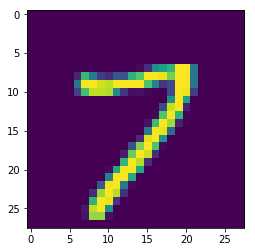

(60000, 28, 28)

In [6]:
param = 30001

print(y_train[param])
plt.imshow(x_train[param])
plt.show()
x_train.shape

Prepare the input data for the ANN Classifier

In [7]:
x_train_ann = [x_train[i].ravel() for i in range(len(x_train))]
x_test_ann = [x_test[i].ravel() for i in range(len(x_test))]

# Create the classifier and define hyperparameters

In [8]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-5, hidden_layer_sizes=(100, 10), random_state=42, verbose=True, batch_size=batch_size, validation_fraction=0.1, early_stopping=True, n_iter_no_change=12)

# Fit the model

In [9]:
clf.fit(x_train_ann, y_train)

Iteration 1, loss = 0.48338240
Validation score: 0.941333
Iteration 2, loss = 0.17582497
Validation score: 0.955833
Iteration 3, loss = 0.12684202
Validation score: 0.964667
Iteration 4, loss = 0.09965734
Validation score: 0.966500
Iteration 5, loss = 0.08274637
Validation score: 0.969333
Iteration 6, loss = 0.06810284
Validation score: 0.970000
Iteration 7, loss = 0.05732939
Validation score: 0.974500


/Users/victorbonjean/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=1e-05, batch_size=100, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=12, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Estimate the class for the test set

In [12]:
y_estimate = clf.predict(x_test_ann)

score = clf.score(x_test_ann, y_test)
print('Score with ANN : {}%'.format(np.round(score*100, 2)))

Score with ANN : 97.26%


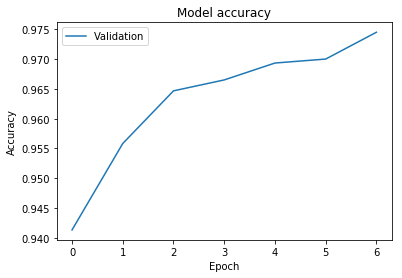

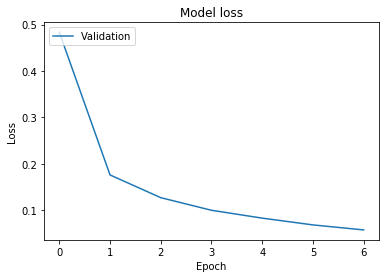

In [13]:
# Plot training & validation accuracy values
plt.plot(clf.validation_scores_)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(clf.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Using Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_features=None, max_depth=12, random_state=0, n_jobs=-1, verbose=True)

In [ ]:
rf.fit(x_train_ann, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


In [ ]:
results = rf.predict(x_test_ann)

score = rf.score(x_test_ann, y_test)
print('Score with RF : {}%'.format(np.round(score*100, 2)))

# Using CNN (Deep Learning)

In [12]:
#some data processing needed to work with keras
y_train_cnn = keras.utils.to_categorical(y_train, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test, num_classes)
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

Here is the convolutional neural network

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

# Fit the model with the training set

In [16]:
history = model.fit(x_train_cnn, y_train_cnn,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 128s 2ms/step - loss: 0.2535 - accuracy: 0.9236 - val_loss: 0.0481 - val_accuracy: 0.9860
Epoch 2/5
54000/54000 [==============================] - 134s 2ms/step - loss: 0.0928 - accuracy: 0.9721 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 3/5
54000/54000 [==============================] - 157s 3ms/step - loss: 0.0693 - accuracy: 0.9790 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 4/5
54000/54000 [==============================] - 158s 3ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0328 - val_accuracy: 0.9900
Epoch 5/5
54000/54000 [==============================] - 133s 2ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0320 - val_accuracy: 0.9905


Evaluate the class

In [72]:
score = model.evaluate(x_test_cnn, y_test_cnn)
print('Score with CNN : {}%'.format(np.round(score[1]*100, 2)))

10000/10000 [==============================] - 11s 1ms/step
Score with CNN : 99.06%


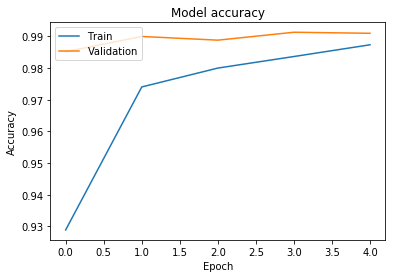

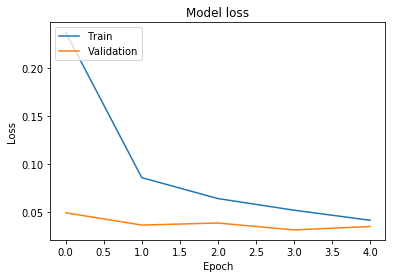

In [73]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()